In [7]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [11]:
def daily_demand(mu, sigma):
    raw_usage = np.random.lognormal(mu, sigma)
    return round(raw_usage,0)

def demand_array(monthly_mu, monthly_sigma, days):
    raw_usage = np.random.lognormal(monthly_mu, monthly_sigma, days)
    return np.round(raw_usage,0)

def plot_demand_distribution(array, bins):
    plt.hist(array, 100, density=True, align='mid')

In [12]:
today_usage = daily_demand(5, .5)
today_usage

290.0

In [13]:
annual_usage = demand_array(5, .5,250)
annual_usage[:7]

array([296., 120., 151.,  94., 115., 266., 178.])

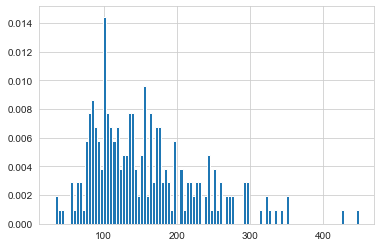

In [14]:
plot_demand_distribution(annual_usage, 1000)

In [15]:
def run_crrp_sim(usage, order_quantity, reorder_point):
    usage = usage
    inventory = order_quantity
    order_quantity = order_quantity
    reorder_point = reorder_point
    
    # Counters
    stockouts = 0
    orders = 0
    
    # Data Dictionary
    data = {'inventory': [], 'usage': [], 'stockout_quantities': []}
    
    # Simulate each days usage and apply 
    # Continous Review Reorder Point
    for day in range(len(usage)-1):
        daily_usage = usage[day]
        
        # Check for Stock Out
        if daily_usage > inventory:
            stockouts += 1
            stockout_quantities = (daily_usage - inventory)
            data['stockout_quantities'].append(stockout_quantities)
            daily_usage = inventory
        else:
            data['stockout_quantities'].append(0)
        
        inventory = inventory - daily_usage
        data['usage'].append(daily_usage)
        
        data['inventory'].append(inventory)
        
    
        if inventory < reorder_point:
            inventory = inventory + order_quantity
        
        
        
    return data
            

In [16]:
order_quantity = 2500
reorder_point = 100

In [17]:
data = run_crrp_sim(annual_usage, order_quantity, reorder_point)
inventory = np.array(data['inventory'])
stockout_qty = np.array(data['stockout_quantities'])

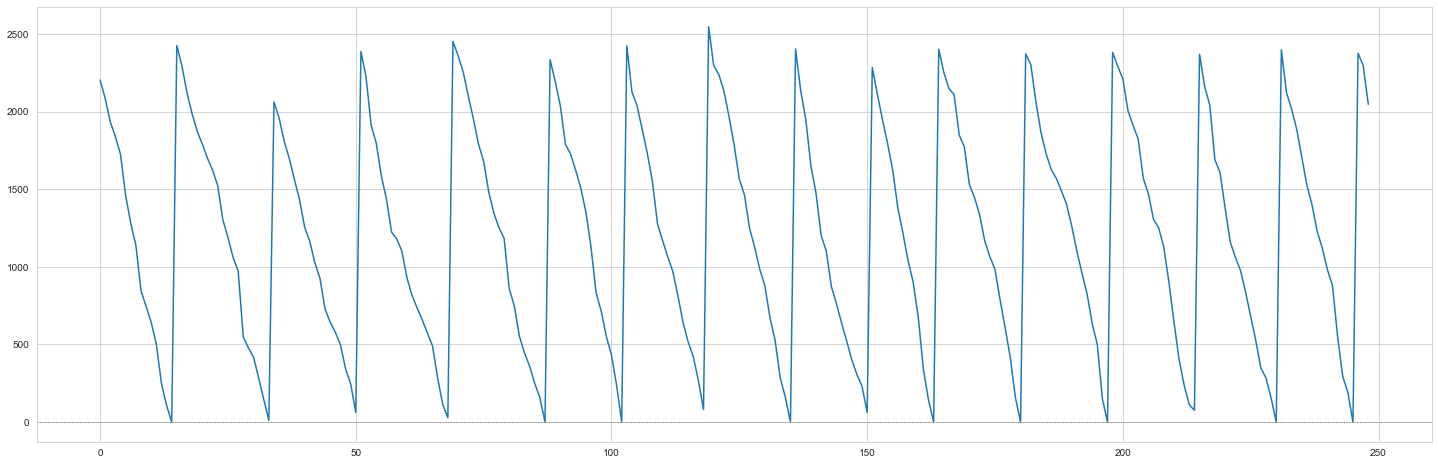

In [18]:
plt.figure(figsize=(25,8))
plt.plot(data['inventory'])
plt.axhline(0, linewidth=1, color="grey", linestyle=":")
plt.show()

In [19]:
stockout_qty.sum()

670.0

In [20]:
stockouts = np.count_nonzero(stockout_qty)
stockouts

9

In [21]:
inventory.max()

2548.0

In [22]:
inventory.min()

0.0

In [23]:
datadf = pd.DataFrame(data)
datadf.head()

,inventory,usage,stockout_quantities
0,2204.0,296.0,0.0
1,2084.0,120.0,0.0
2,1933.0,151.0,0.0
3,1839.0,94.0,0.0
4,1724.0,115.0,0.0
